## SNV analysis of single cell sequencing data. 

VCF files for all single cell sequencing data were generated using LoFreq. SNVs are filtered to exclude SNVs present in the parental population. 

In MOI=1 only 24 and 48 time points have enough cells with sufficient read depth to analyze
MOI=10 timepoint 4 has very few cells, 12, 24, and 48 all have sufficient data. 

This notebook needs dataframes from the DENVparSNV notebook (SNVp holds all parental SNVs) and the depthDENV01 notebook (7 dataframes with all depth info per cell). 

In [3]:
from pysam import VariantFile
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
from scipy.optimize import curve_fit
from scipy.misc import factorial
import scipy
from scipy import stats

In [4]:
dataDir = "/Users/felix/Documents/arbovirusGenetics/DENV_ZIKV_singelCell/pySamProcessing/DENVvar/varfilesDENV01"
os.chdir(dataDir)

In [5]:
### metadataD holds all info from original eLife paper, 
### depth_xxx gives average depth per cell (grouped by timepoint and MOI)
### SNVp has all parental SNVs

%store -r metadataD
%store -r depth_df48
%store -r depth_df24
%store -r depth_df12
%store -r depth_df48_2
%store -r depth_df24_2
%store -r depth_df12_2
%store -r depth_df4_2
%store -r SNVp

In [6]:
metadataD.head()

,barcode,cellID,index,experiment,sequencingInstrument,sequencingRun,sequencingDate,cellType,qPCR,virus,numberDengueReads,numberZikaReads,MOI,time [h],description
0,Barcode_701-502EX1,1001700601_A2,TAAGGCGA-CTCTATACGT,10017006,NextSeq,N349,2017/01/27,huh7,NaN,dengue,0,NaN,0,4,NaN
1,Barcode_701-513EX1,1001700601_A4,TAAGGCGA-GACTAGACGT,10017006,NextSeq,N349,2017/01/27,huh7,NaN,dengue,0,NaN,0,4,NaN
2,Barcode_701-503EX1,1001700601_A6,TAAGGCGA-TCCTCTACGT,10017006,NextSeq,N349,2017/01/27,huh7,NaN,dengue,0,NaN,0,4,NaN
3,Barcode_701-515EX1,1001700601_A8,TAAGGCGA-CTAGCTACGT,10017006,NextSeq,N349,2017/01/27,huh7,NaN,dengue,0,NaN,0,4,NaN
4,Barcode_701-505EX1,1001700601_B3,TAAGGCGA-AAGGAGACGT,10017006,NextSeq,N349,2017/01/27,huh7,NaN,dengue,0,NaN,0,4,NaN


In [20]:
### Get all SNVs for MOI1, including SNVs present in parental strain

# _=fig=plt.figure(figsize=(10, 5), dpi=100)

allSNV48 = pd.DataFrame(columns = ['pos', 'af'])
allSNV24 = pd.DataFrame(columns = ['pos', 'af'])

numFixPos48 = np.zeros(10723, dtype=int)
numFixPos24 = np.zeros(10723, dtype=int)

for i in depth_df48.cellID:
    df = pd.read_pickle('vars' + str(i) + '_df.pkl')
#     plt.plot(df.pos,df.af,'.k', alpha = 0.25)
    allSNV48 = allSNV48.append(df, ignore_index = True)
    numFixPos48[df.loc[df['af'] > 0.9, ['pos']].values.astype(int)] = numFixPos48[df.loc[df['af'] > 0.9, ['pos']].values.astype(int)] + 1

    
for i in depth_df24.cellID:
    df = pd.read_pickle('vars' + str(i) + '_df.pkl')
#     plt.plot(df.pos,df.af,'.r', alpha = 0.25)
    allSNV24 = allSNV24.append(df, ignore_index = True)
    numFixPos24[df.loc[df['af'] > 0.9, ['pos']].values.astype(int)] = numFixPos24[df.loc[df['af'] > 0.9, ['pos']].values.astype(int)] + 1


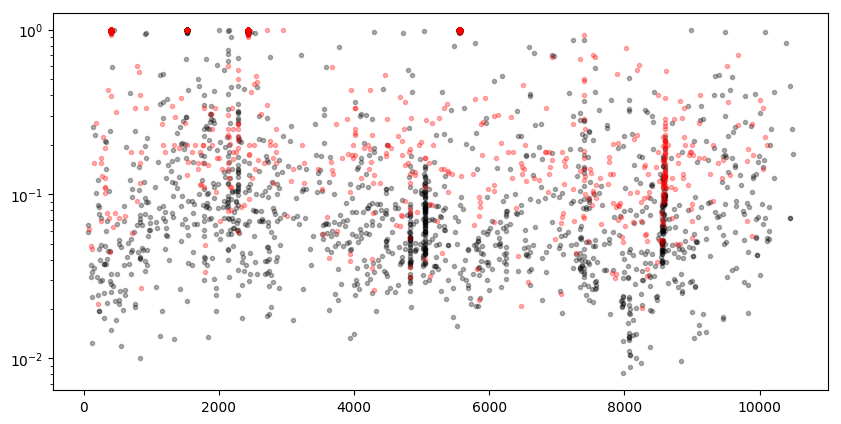

In [21]:
_=fig=plt.figure(figsize=(10, 5), dpi=100)
plt.plot(allSNV48.pos, allSNV48.af,'.k', alpha=0.3)
plt.plot(allSNV24.pos, allSNV24.af,'.r', alpha=0.3)
plt.yscale('log')

In [22]:
### Get all SNVs for MOI1, including SNVs present in parental strain

# _=fig=plt.figure(figsize=(12, 7), dpi=100)

allSNV48_2 = pd.DataFrame(columns = ['pos', 'af'])
allSNV24_2 = pd.DataFrame(columns = ['pos', 'af'])
allSNV12_2 = pd.DataFrame(columns = ['pos', 'af'])
allSNV4_2 = pd.DataFrame(columns = ['pos', 'af'])

for i in depth_df48_2.cellID:
    df = pd.read_pickle('vars' + str(i) + '_df.pkl')
#     plt.plot(df.pos,df.af,'.k', alpha = 0.35)
    allSNV48_2 = allSNV48_2.append(df, ignore_index = True)
    
for i in depth_df24_2.cellID:
    df = pd.read_pickle('vars' + str(i) + '_df.pkl')
#     plt.semilogy(df.pos,df.af,'.y', alpha = 0.35)
    allSNV24_2 = allSNV24_2.append(df, ignore_index = True)


for i in depth_df12_2.cellID:
    df = pd.read_pickle('vars' + str(i) + '_df.pkl')
#     plt.semilogy(df.pos,df.af,'.m', alpha = 0.35)
    allSNV12_2 = allSNV12_2.append(df, ignore_index = True)
    
for i in depth_df4_2.cellID:
    df = pd.read_pickle('vars' + str(i) + '_df.pkl')
#     plt.semilogy(df.pos,df.af,'.c', alpha = 0.35)
    allSNV4_2 = allSNV4_2.append(df, ignore_index = True)
    
# plt.xlim([7570,10269])

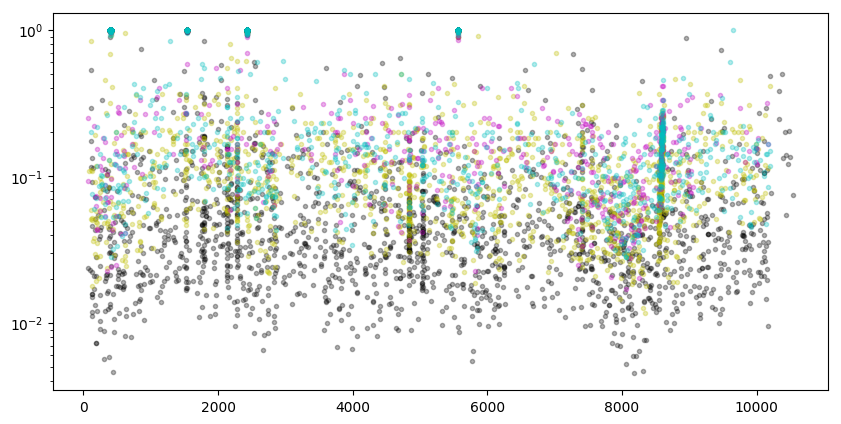

In [23]:
_=fig=plt.figure(figsize=(10, 5), dpi=100)
plt.plot(allSNV48_2.pos, allSNV48_2.af,'.k', alpha=0.3)
plt.plot(allSNV24_2.pos, allSNV24_2.af,'.y', alpha=0.3)
plt.plot(allSNV12_2.pos, allSNV12_2.af,'.m', alpha=0.3)
plt.plot(allSNV4_2.pos, allSNV4_2.af,'.c', alpha=0.3)
plt.yscale('log')

In [24]:
allSNVmoi1 = pd.DataFrame(columns = ['pos', 'af'])
allSNVmoi1 = allSNVmoi1.append([allSNV24, allSNV48], ignore_index=True)
allSNVmoi10 = pd.DataFrame(columns = ['pos', 'af'])
allSNVmoi10 = allSNVmoi10.append([allSNV4_2, allSNV12_2, allSNV24_2, allSNV48_2], ignore_index=True)

In [25]:
### identify SNVs that are in parental sequence and in SC data:
commonSNVmoi1 = pd.merge(SNVp, allSNVmoi1, on='pos')
commonSNVmoi10 = pd.merge(SNVp, allSNVmoi10, on='pos')
commonSNVmoi10.head()

,pos,af_x,af_y
0,239,0.014945,0.024510
1,326,0.011843,0.052632
2,399,0.977528,1.000000
3,399,0.977528,1.000000
4,399,0.977528,0.983871


In [27]:
### Exclude all SNVs that were present in the parental population from SC data:

### MOI1 per timepoint
novoSNV24 = allSNV24.loc[~allSNV24['pos'].isin(SNVp.pos)]
novoSNV48 = allSNV48.loc[~allSNV48['pos'].isin(SNVp.pos)]

### MOI10 per timepoint
novoSNV4_2 = allSNV4_2.loc[~allSNV4_2['pos'].isin(SNVp.pos)]
novoSNV12_2 = allSNV12_2.loc[~allSNV12_2['pos'].isin(SNVp.pos)]
novoSNV24_2 = allSNV24_2.loc[~allSNV24_2['pos'].isin(SNVp.pos)]
novoSNV48_2 = allSNV48_2.loc[~allSNV48_2['pos'].isin(SNVp.pos)]

### timepoints combined per MOI
novoAllSNVmoi1 = allSNVmoi1.loc[~allSNVmoi1['pos'].isin(SNVp.pos)]
novoAllSNVmoi10 = allSNVmoi10.loc[~allSNVmoi10['pos'].isin(SNVp.pos)]


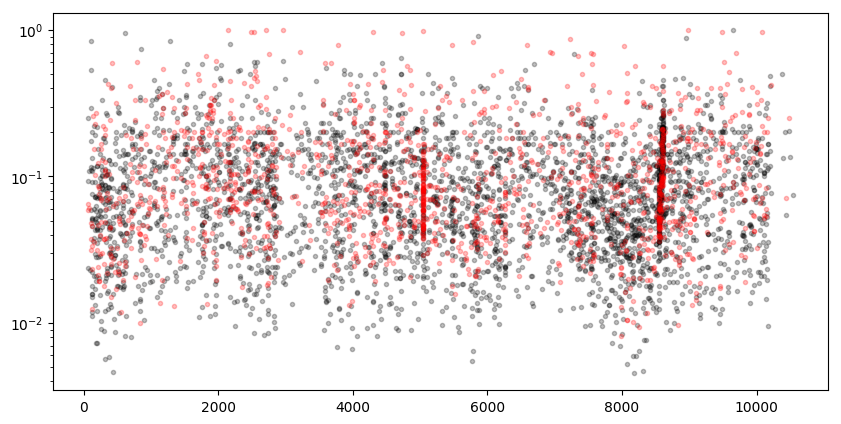

In [28]:
### Plot all SNVs excluding parental ones. 

plt.figure(figsize=(10,5), dpi=100)
plt.plot(novoAllSNVmoi10.pos, novoAllSNVmoi10.af ,'.k', alpha=0.25)
plt.plot(novoAllSNVmoi1.pos, novoAllSNVmoi1.af ,'.r', alpha=0.25)
# plt.xlim([8550,8560])
plt.yscale('log')

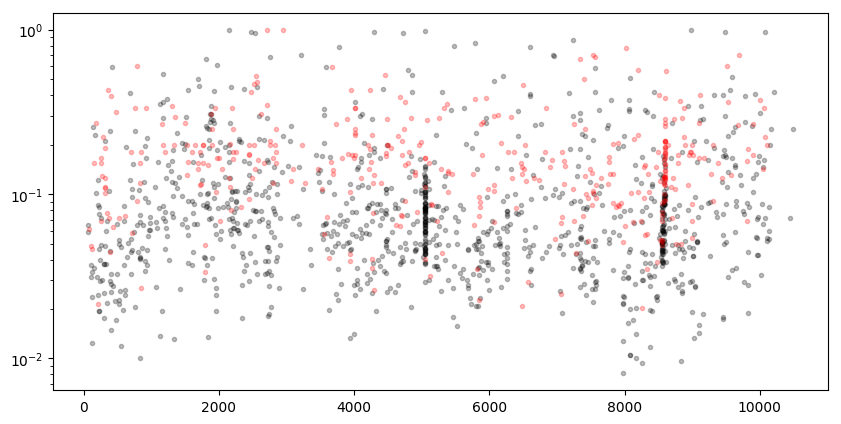

In [29]:
### Plot all SNVs excluding parental ones for MOI1. 

plt.figure(figsize=(10,5), dpi=100)
plt.plot(novoSNV48.pos, novoSNV48.af ,'.k', alpha=0.25)
plt.plot(novoSNV24.pos, novoSNV24.af ,'.r', alpha=0.25)
# plt.xlim([8550,8560])
plt.yscale('log')

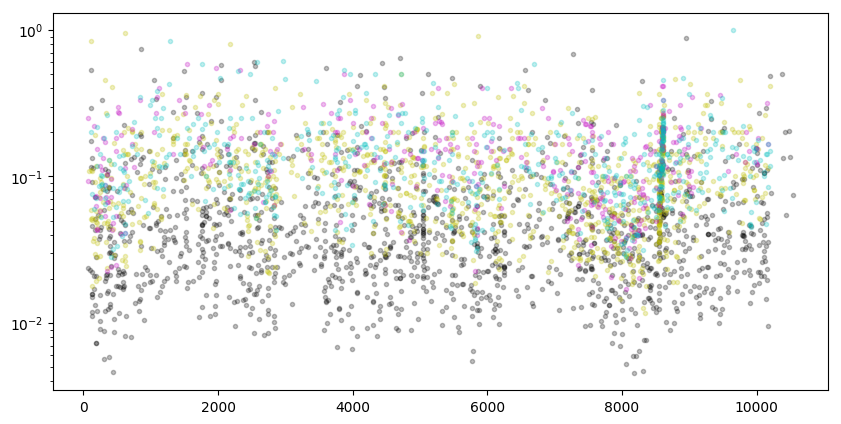

In [30]:
### Plot all SNVs excluding parental ones for MOI10.

plt.figure(figsize=(10,5), dpi=100)
plt.plot(novoSNV48_2.pos, novoSNV48_2.af ,'.k', alpha=0.25)
plt.plot(novoSNV24_2.pos, novoSNV24_2.af ,'.y', alpha=0.25)
plt.plot(novoSNV12_2.pos, novoSNV12_2.af ,'.m', alpha=0.25)
plt.plot(novoSNV4_2.pos, novoSNV4_2.af ,'.c', alpha=0.25)
# plt.xlim([8550,8560])
plt.yscale('log')

In [31]:
%store novoSNV24
%store novoSNV48
%store novoSNV4_2
%store novoSNV12_2
%store novoSNV24_2
%store novoSNV48_2
%store novoAllSNVmoi1
%store novoAllSNVmoi10


Stored 'novoSNV24' (DataFrame)
Stored 'novoSNV48' (DataFrame)
Stored 'novoSNV4_2' (DataFrame)
Stored 'novoSNV12_2' (DataFrame)
Stored 'novoSNV24_2' (DataFrame)
Stored 'novoSNV48_2' (DataFrame)
Stored 'novoAllSNVmoi1' (DataFrame)
Stored 'novoAllSNVmoi10' (DataFrame)


In [32]:
## create dataframes with num de novo SNVs per cell

### MOI 1

df12n = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df24n = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df48n = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])

for i, row in depth_df12.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df12n = df12n.append(df2, ignore_index = True)
    
for i, row in depth_df24.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df24n = df24n.append(df2, ignore_index = True)
    
for i, row in depth_df48.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df48n = df48n.append(df2, ignore_index = True)

    
### MOI 10

df4n_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df12n_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df24n_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df48n_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])

for i, row in depth_df4_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df4n_2 = df4n_2.append(df2, ignore_index = True)
    
for i, row in depth_df12_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df12n_2 = df12n_2.append(df2, ignore_index = True)
    
for i, row in depth_df24_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df24n_2 = df24n_2.append(df2, ignore_index = True)
    
for i, row in depth_df48_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df = df.loc[~df['pos'].isin(SNVp.pos)]
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df48n_2 = df48n_2.append(df2, ignore_index = True)
    


In [33]:
%store df12n 
%store df24n
%store df48n
%store df4n_2
%store df12n_2 
%store df24n_2
%store df48n_2

Stored 'df12n' (DataFrame)
Stored 'df24n' (DataFrame)
Stored 'df48n' (DataFrame)
Stored 'df4n_2' (DataFrame)
Stored 'df12n_2' (DataFrame)
Stored 'df24n_2' (DataFrame)
Stored 'df48n_2' (DataFrame)


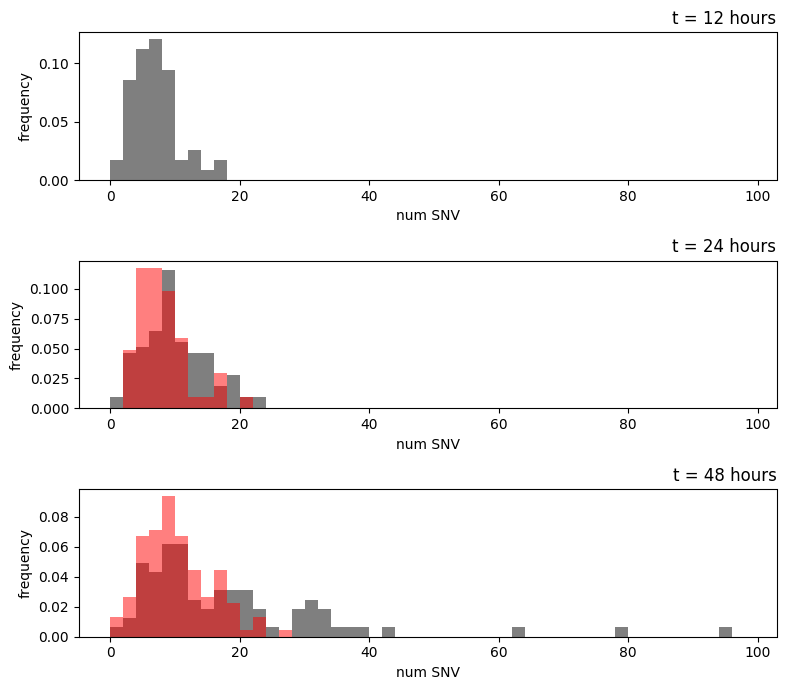

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(8,7), dpi=100)

axs[0].hist(df12n_2.numSNV, range(0,100,2), normed=True, histtype='bar',stacked=False, color='k', alpha=0.5)
axs[0].set_title('t = 12 hours', loc='right')
axs[0].set_xlabel('num SNV')
axs[0].set_ylabel('frequency')

axs[1].hist(df24n_2.numSNV, range(0,100,2), normed=True, histtype='bar',stacked=False, color='k', alpha=0.5)
axs[1].hist(df24n.numSNV, range(0,100,2), normed=True, histtype='bar',stacked=False, color='r', alpha=0.5)
axs[1].set_title('t = 24 hours', loc='right')
axs[1].set_xlabel('num SNV')
axs[1].set_ylabel('frequency')

axs[2].hist(df48n_2.numSNV, range(0,100,2), normed=True, histtype='bar',stacked=False, color='k', alpha=0.5)
axs[2].hist(df48n.numSNV, range(0,100,2), normed=True, histtype='bar',stacked=True, color='r', alpha=0.5)
axs[2].set_title('t = 48 hours', loc='right')
axs[2].set_xlabel('num SNV')
axs[2].set_ylabel('frequency')

plt.tight_layout()

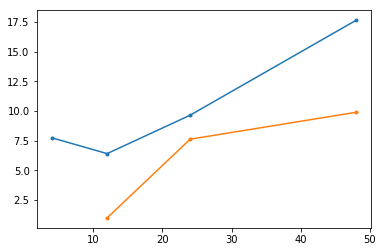

In [35]:
plt.plot([4, 12, 24, 48],[df4n_2.numSNV.mean(), df12n_2.numSNV.mean(), df24n_2.numSNV.mean(), df48n_2.numSNV.mean()],'.-')
plt.plot([ 12, 24, 48], [df12n.numSNV.mean(), df24n.numSNV.mean(), df48n.numSNV.mean()],'.-')


In [36]:
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

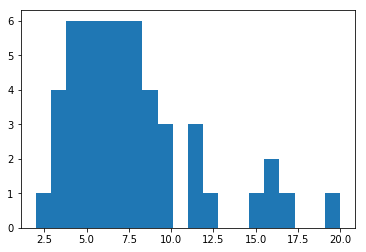

In [37]:
entries, bin_edges, patches = plt.hist(df24n.numSNV, bins=20)
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries)

In [38]:
parameters

array([ 6.05495043])

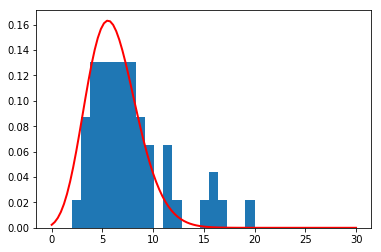

In [39]:
x_plot = np.linspace(0, 30, 100)
plt.hist(df24n.numSNV, bins=20, normed=True)
plt.plot(x_plot, poisson(x_plot, * parameters), 'r-', lw=2)

In [40]:
a = df48n.numSNV.values
a.var() / a.mean()

2.7425219185146985

In [191]:
stats.kstest(a.astype(int), 'poisson', args=(a.mean(),))

KstestResult(statistic=0.10554160025932194, pvalue=0.59970018895283594)

In [45]:
### Get dataframes including parental SNVs

### MOI 1

df12 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df24 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df48 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])

for i, row in depth_df12.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df12 = df12.append(df2, ignore_index = True)
    
for i, row in depth_df24.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df24 = df24.append(df2, ignore_index = True)
    
for i, row in depth_df48.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df48 = df48.append(df2, ignore_index = True)

### MOI 10

df4_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df12_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df24_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])
df48_2 = pd.DataFrame(columns = ['cellID', 'depth', 'numSNV'])

for i, row in depth_df4_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df4_2 = df4_2.append(df2, ignore_index = True)
    
for i, row in depth_df12_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df12_2 = df12_2.append(df2, ignore_index = True)
    
for i, row in depth_df24_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df24_2 = df24_2.append(df2, ignore_index = True)
    
for i, row in depth_df48_2.iterrows():
    df = pd.read_pickle('vars' + str(row.cellID) + '_df.pkl')
    df2 = pd.DataFrame([[row.cellID, row.depth, len(df)]], columns = ['cellID', 'depth', 'numSNV'])
    df48_2 = df48_2.append(df2, ignore_index = True)

In [47]:
# %store df4
%store df12
%store df24
%store df48
%store df4_2
%store df12_2
%store df24_2
%store df48_2

Stored 'df12' (DataFrame)
Stored 'df24' (DataFrame)
Stored 'df48' (DataFrame)
Stored 'df4_2' (DataFrame)
Stored 'df12_2' (DataFrame)
Stored 'df24_2' (DataFrame)
Stored 'df48_2' (DataFrame)
